# Lab 9 - Natural Language Processing – Finding Text Similarities
Total Marks: 8 Marks + 2 marks (individual assessment)= 10 Marks

### Id Text
<ol>
<li> In the past John liked only sport but now he likes sport and politics </li>
<li>Sam only liked politics but now he is fan of both music and politics</li>
<li> Sara likes both books and politics but in the past she only read books</li>
<li> Robert loved both books and nature but now he only reads books</li>
<li>Linda liked books and sport but she only likes sport now</li>
<li>Alison used to loved nature but currently she likes both nature and sport</li>
</ol>

<hr>

<dl>
<dt>Tips: </dt>
<dd>• You will need to adjust the vector size in order to find the appropriate k-value</dd>
</dl>
<br>
Using Python language, perform the followings NLP tasks to find the similarities between the given sentences:


In [228]:
#ignore  numpy floating point depreciation warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#text preprocessing
import pandas as pd
import re 
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

dataset = pd.read_csv('nlp-dataset.csv')
# print(dataset.describe())
# print("Number of missing data:",dataset.isna().any().sum())
# print("Number of duplicate data:",dataset.duplicated().sum())

#sentences = dataset['text'].tolist()
sentences = dataset['text'].values

corpus = []

"""
Q1. Using NLTK word_tokenize function, tokenize the given sentences
"""

for sentence in sentences:
    sentence = sentence.lower()

    #tokenization
    words = word_tokenize(sentence)
    """
    Q2. Using NLTK PorterStemmer, perform the stemming for the tokens of the sentences
    """
    #stemming
    words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))] 

    """
    Q3. Using NLTK WordNetLemmatizer, perform the lemmatization for the stemmed tokens
    lemmatization (find words, not like separate from likes)
    """
    words = [lemmatizer.lemmatize(word.lower()) for word in words]

    sentence = ' '.join(words)
    corpus.append(sentence)


[nltk_data] Downloading package punkt to /Users/jennylong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jennylong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jennylong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 4. Using sklearn K-means clustering technique, cluster the given sentences. Find the feature vectors for the input of a K-means algorithm using the below techniques. Also, find an appropriate K-value using a KneeLocator method from the python kneed library.


## `a. TF-IDF`
Term Frequency-Inverse Document Frequency is a numerical statistic that demonstrates how important a word is to a corpus. 
<dl>
<dt>TF<em>(Term Frequency)</em>:<dt>
<dd> ratio number of current word to the number of all words in document/string/etc</dd>
<br>
<dt>IDF <em>(Inverse Document Frequency)</em>:</dt>
<dd>number of documents that were counted in the searched collection and referenced based on their term</dd>
</dl>

#### better choice than TF alone
<li>the more frequent a word is in the corpus, the smaller weight it receives 
</li>
<li>common words such as articles will receive smaller weight </li>
<li> rare words(important for context) will have more weight</li>


In [246]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(norm='l2',max_features=12)
tfidf = v.fit_transform(corpus)

print("A list of features:")
print("=============================================")
print(v.get_feature_names())

print("Tf-idf-weighted document-term matrix:")
print("=============================================")
dp = pd.DataFrame(tfidf.toarray(),columns=v.get_feature_names())
print(dp)

A list of features:
['alison', 'book', 'like', 'love', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport']
Tf-idf-weighted document-term matrix:
     alison      book      like      love     natur      past     polit  \
0  0.000000  0.000000  0.504883  0.000000  0.000000  0.404050  0.341127   
1  0.000000  0.000000  0.287314  0.000000  0.000000  0.000000  0.776500   
2  0.000000  0.618987  0.229032  0.000000  0.000000  0.366582  0.309494   
3  0.000000  0.623322  0.000000  0.369149  0.369149  0.000000  0.000000   
4  0.000000  0.372923  0.551943  0.000000  0.000000  0.000000  0.000000   
5  0.442639  0.000000  0.226776  0.362970  0.725940  0.000000  0.000000   

       read    robert       sam      sara     sport  
0  0.000000  0.000000  0.000000  0.000000  0.682253  
1  0.000000  0.000000  0.560802  0.000000  0.000000  
2  0.366582  0.000000  0.000000  0.447043  0.000000  
3  0.369149  0.450174  0.000000  0.000000  0.000000  
4  0.000000  0.000000  0.000000  0.000000  

4


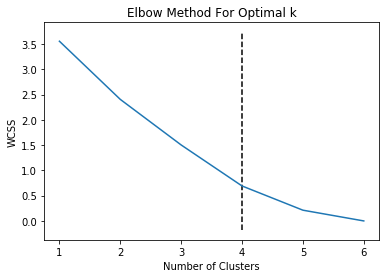

In [247]:
import statsmodels.api as sm
import sklearn.cluster as cluster

wcss = []
for i in range(1,7):
    kmeans= cluster.KMeans(n_clusters=i, init="k-means++")
    kmeans = kmeans.fit(tfidf)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

mycenters=pd.DataFrame({'Clusters': range(1,7),'WCSS':wcss})

from kneed import KneeLocator
number_clusters = range(1,7)
kneedle = KneeLocator(number_clusters,wcss,curve='convex',direction='decreasing')
print(kneedle.knee)

plt.plot(number_clusters,wcss)
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.vlines(kneedle.knee,plt.ylim()[0],plt.ylim()[1], linestyles='dashed')
plt.show()


### 5. Visualize the clusters using the word clouds.

                                                text  cluster
0  In the past John liked only sport but now he l...        1
1  Sam only liked politics but now he is fan of b...        3
2  Sara likes both books and politics but in the ...        2
3  Robert loved both books and nature but now he ...        2
4  Linda liked books and sport but she only likes...        1
5  Alison used to loved nature but currently she ...        0
CLuster: 0


<Figure size 720x720 with 0 Axes>

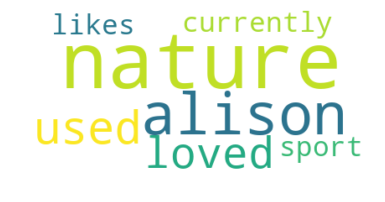

CLuster: 1


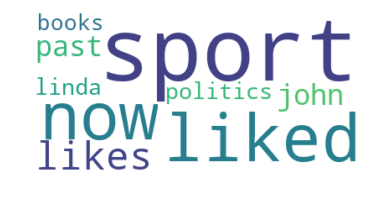

CLuster: 2


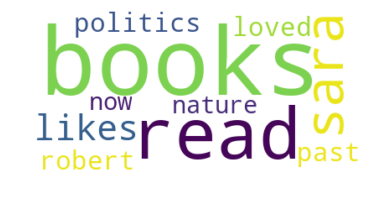

CLuster: 3


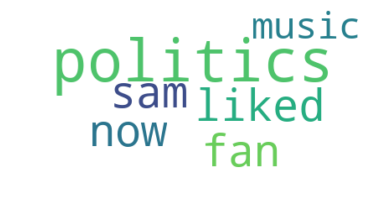

In [248]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=1).fit(dp)
y_kmeans = kmeans.fit_predict(tfidf)
dataset['cluster'] = y_kmeans
labels=kmeans.labels_
doc_cl=dataset[['text','cluster']]
print(doc_cl)

from wordcloud import WordCloud
plt.figure(figsize=(10,10))

for k in range(0,4):
    s=doc_cl.loc[doc_cl['cluster']== k]
    t=s['text'].str.cat(sep=' ')
    t=t.lower()
    t= ' '.join([word for word in t.split()])
    word_cloud = WordCloud(collocations=False,background_color='white').generate(t)
    print('CLuster: {}'.format(k))
    plt.figure()
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

<hr>

## `b. TF`
we don't really care if a word is common or not. Thus, common words like e.g. articles receive a large weight even if they contribute no real information.


In [262]:
v= TfidfVectorizer(use_idf=False,norm='l1',max_features=12)
tf = v.fit_transform(corpus)


print("A list of features:")
print("=============================================")
print(v.get_feature_names())

print("Tf-weighted document-term matrix:")
print("=============================================")
dp = pd.DataFrame(tf.toarray(),columns=v.get_feature_names())
print(dp)


A list of features:
['alison', 'book', 'like', 'love', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport']
Tf-weighted document-term matrix:
     alison      book      like      love     natur      past     polit  \
0  0.000000  0.000000  0.333333  0.000000  0.000000  0.166667  0.166667   
1  0.000000  0.000000  0.250000  0.000000  0.000000  0.000000  0.500000   
2  0.000000  0.285714  0.142857  0.000000  0.000000  0.142857  0.142857   
3  0.000000  0.333333  0.000000  0.166667  0.166667  0.000000  0.000000   
4  0.000000  0.200000  0.400000  0.000000  0.000000  0.000000  0.000000   
5  0.166667  0.000000  0.166667  0.166667  0.333333  0.000000  0.000000   

       read    robert   sam      sara     sport  
0  0.000000  0.000000  0.00  0.000000  0.333333  
1  0.000000  0.000000  0.25  0.000000  0.000000  
2  0.142857  0.000000  0.00  0.142857  0.000000  
3  0.166667  0.166667  0.00  0.000000  0.000000  
4  0.000000  0.000000  0.00  0.000000  0.400000  
5  0.000000  0.00

4


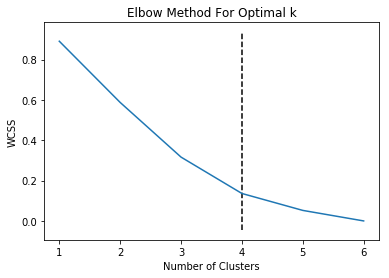

In [252]:
wcss = []
for i in range(1,7):
    kmeans= cluster.KMeans(n_clusters=i, init="k-means++")
    kmeans = kmeans.fit(tf)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

mycenters=pd.DataFrame({'Clusters': range(1,7),'WCSS':wcss})
mycenters

from kneed import KneeLocator
number_clusters = range(1,7)
kneedle = KneeLocator(number_clusters,wcss,curve='convex',direction='decreasing')
print(kneedle.knee)

plt.plot(number_clusters,wcss)
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.vlines(kneedle.knee,plt.ylim()[0],plt.ylim()[1], linestyles='dashed')
plt.show()

### 5. Visualize the clusters using the word clouds.

                                                text  cluster
0  In the past John liked only sport but now he l...        1
1  Sam only liked politics but now he is fan of b...        3
2  Sara likes both books and politics but in the ...        2
3  Robert loved both books and nature but now he ...        2
4  Linda liked books and sport but she only likes...        1
5  Alison used to loved nature but currently she ...        0
CLuster: 0


<Figure size 720x720 with 0 Axes>

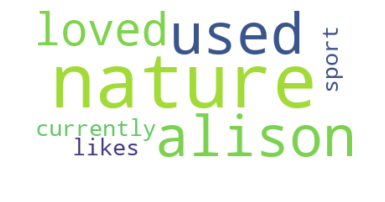

CLuster: 1


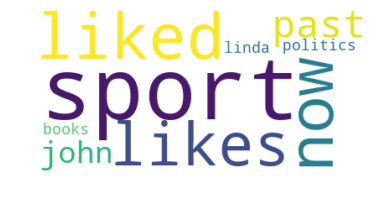

CLuster: 2


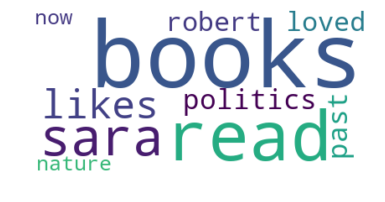

CLuster: 3


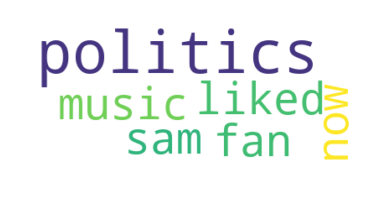

In [253]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=1).fit(dp)
y_kmeans = kmeans.fit_predict(tf)
dataset['cluster'] = y_kmeans
labels=kmeans.labels_
doc_cl=dataset[['text','cluster']]
print(doc_cl)

from wordcloud import WordCloud
plt.figure(figsize=(10,10))

for k in range(0,4):
    s=doc_cl.loc[doc_cl['cluster']== k]
    t=s['text'].str.cat(sep=' ')
    t=t.lower()
    t= ' '.join([word for word in t.split()])
    word_cloud = WordCloud(collocations=False,background_color='white').generate(t)
    print('CLuster: {}'.format(k))
    plt.figure()
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

<hr>

## `c. BOW`
<dl> 
<dt>Bag Of Words:</dt> 
<dd>Represent texts as numbers & place them into matrix</dd>
<dd>tallies the # of time a word occurs</dl>
<dt>CONS:</dt> 
<dd>semantic analysis is not considered</dd>
<dd>higher chance of overfitting</dd>
<dd>word arrangement doesn't matter</dd>
</dl>

In [233]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english',max_features=12)
X = vectorizer.fit_transform(corpus)
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df_bow_sklearn.head()

,alison,book,like,love,natur,past,polit,read,robert,sam,sara,sport
0,0,0,2,0,0,1,1,0,0,0,0,2
1,0,0,1,0,0,0,2,0,0,1,0,0
2,0,2,1,0,0,1,1,1,0,0,1,0
3,0,2,0,1,1,0,0,1,1,0,0,0
4,0,1,2,0,0,0,0,0,0,0,0,2


4


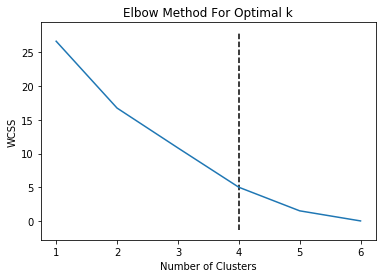

In [234]:
wcss = []
for i in range(1,7):
    kmeans= cluster.KMeans(n_clusters=i, init="k-means++")
    kmeans = kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

mycenters=pd.DataFrame({'Clusters': range(1,7),'WCSS':wcss})
mycenters

from kneed import KneeLocator
number_clusters = range(1,7)
kneedle = KneeLocator(number_clusters,wcss,curve='convex',direction='decreasing')
print(kneedle.knee)

plt.plot(number_clusters,wcss)
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.vlines(kneedle.knee,plt.ylim()[0],plt.ylim()[1], linestyles='dashed')
plt.show()

### 5. Visualize the clusters using the word clouds.

                                                text  cluster
0  In the past John liked only sport but now he l...        1
1  Sam only liked politics but now he is fan of b...        3
2  Sara likes both books and politics but in the ...        2
3  Robert loved both books and nature but now he ...        2
4  Linda liked books and sport but she only likes...        1
5  Alison used to loved nature but currently she ...        0
CLuster: 0


<Figure size 720x720 with 0 Axes>

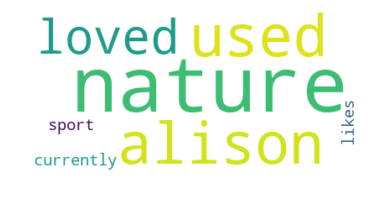

CLuster: 1


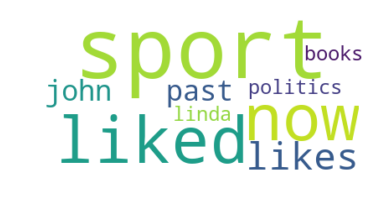

CLuster: 2


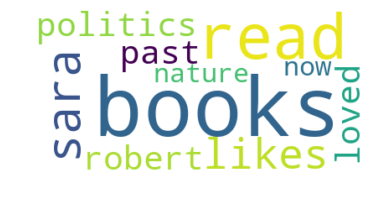

CLuster: 3


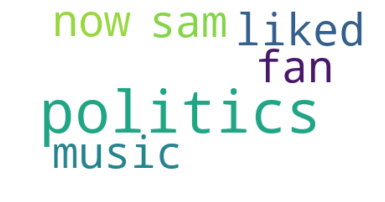

In [242]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=1).fit(df_bow_sklearn)
y_kmeans = kmeans.fit_predict(X)
dataset['cluster'] = y_kmeans
labels=kmeans.labels_
doc_cl=dataset[['text','cluster']]
print(doc_cl)

from wordcloud import WordCloud
plt.figure(figsize=(10,10))

for k in range(0,4):
    s=doc_cl.loc[doc_cl['cluster']== k]
    t=s['text'].str.cat(sep=' ')
    t=t.lower()
    t= ' '.join([word for word in t.split()])
    word_cloud = WordCloud(collocations=False,background_color='white').generate(t)
    print('CLuster: {}'.format(k))
    plt.figure()
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

<hr>

## `d. Word2Vec`
<li>converts words in a vector space representation</li>
<li>similar words are placed close to each other while dissimilar words are farther away</li>
<li>uses semantic relationship between words for vector representation</li>


In [286]:
"""
GENISM: Generate Similar
"""
import numpy as np
from gensim.models import Word2Vec

for sentence in sentences:
    sentence = sentence.lower()
    
#tokenize list of sentences to list of words (sentences is prev declared)
tokenized_words = [nltk.word_tokenize(sentence)for sentence in sentences]

#define english stopwords
stop_words = stopwords.words('english')
#remove stopwords from text and change to lowercase
for i, _ in enumerate(tokenized_words):
    tokenized_words[i] = [word for word in tokenized_words[i] if word not in stop_words]
    tokenized_words[i] = [lemmatizer.lemmatize(word.lower()) for word in tokenized_words[i]] 

def featurevector(sent,m):
    v = []
    nw = 0
    for w in sent:
        try:
            if nw == 0:
                v = m.wv[w]
            else:
                v = np.add(v,m.wv[w])
            nw+=1
        except:
            pass
        print(v)
    return np.asarray(v)/nw

#invoke word2vec
model = Word2Vec(tokenized_words,min_count=1,size=12) #min_count = 1 since text is small
#return list of words learned
learned_words = list(model.wv.vocab)
print("Learned Words:\n",learned_words,"\n")

l = []
for i in tokenized_words:
    l.append(featurevector(i,model))
X = np.array(l)

Learned Words:
 ['in', 'past', 'john', 'liked', 'sport', 'like', 'politics', 'sam', 'fan', 'music', 'sara', 'book', 'read', 'robert', 'loved', 'nature', 'linda', 'alison', 'used', 'currently'] 

[-0.02450556  0.03414617  0.02288613 -0.03505009 -0.01302942 -0.02067077
  0.01432689 -0.00813706  0.01669187  0.00607946 -0.01887153 -0.00862912]
[-0.05922067  0.02265979 -0.01062768 -0.02462719 -0.02800275  0.01088186
  0.02437703 -0.02356263 -0.00847366 -0.02044365  0.00652956  0.02830743]
[-0.04531356 -0.01252336  0.02933617 -0.05150106 -0.06846069  0.0324164
  0.05207042 -0.05512236 -0.01717155 -0.00281276  0.00150056  0.03030204]
[-0.07150635 -0.04619201  0.04284564 -0.03546727 -0.05256049  0.02327134
  0.03485956 -0.07003946  0.02080152 -0.0376443  -0.04014677  0.00799785]
[-0.06796966 -0.06274439  0.04660186 -0.03391387 -0.05494808  0.03920105
  0.05108634 -0.04835924  0.01023679 -0.00960143 -0.03969429 -0.03310309]
[-0.06791691 -0.09349632  0.04790697 -0.02577779 -0.02253833  0.0343528

3


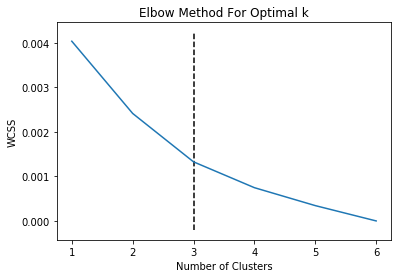

In [224]:
wcss = []
for i in range(1,7):
    kmeans= cluster.KMeans(n_clusters=i, init="k-means++")
    kmeans = kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

mycenters=pd.DataFrame({'Clusters': range(1,7),'WCSS':wcss})
mycenters

from kneed import KneeLocator
number_clusters = range(1,7)
kneedle = KneeLocator(number_clusters,wcss,curve='convex',direction='decreasing')
print(kneedle.knee)

plt.plot(number_clusters,wcss)
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.vlines(kneedle.knee,plt.ylim()[0],plt.ylim()[1], linestyles='dashed')
plt.show()

### 5. Visualize the clusters using the word clouds.

                                                text  cluster
0  In the past John liked only sport but now he l...        0
1  Sam only liked politics but now he is fan of b...        2
2  Sara likes both books and politics but in the ...        1
3  Robert loved both books and nature but now he ...        1
4  Linda liked books and sport but she only likes...        0
5  Alison used to loved nature but currently she ...        0
CLuster: 0


<Figure size 720x720 with 0 Axes>

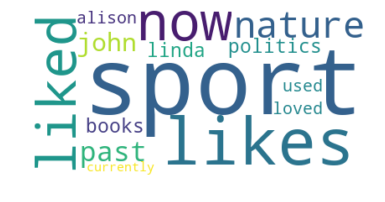

CLuster: 1


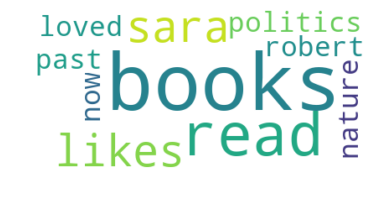

CLuster: 2


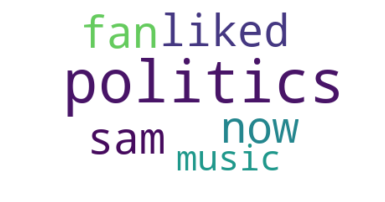

In [290]:
#not sure about this
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=1).fit(X)
y_kmeans = kmeans.fit_predict(X)
dataset['cluster'] = y_kmeans
labels=kmeans.labels_
doc_cl=dataset[['text','cluster']]
print(doc_cl)

from wordcloud import WordCloud
plt.figure(figsize=(10,10))

for k in range(0,3):
    s=doc_cl.loc[doc_cl['cluster']== k]
    t=s['text'].str.cat(sep=' ')
    t=t.lower()
    t= ' '.join([word for word in t.split()])
    word_cloud = WordCloud(collocations=False,background_color='white').generate(t)
    print('CLuster: {}'.format(k))
    plt.figure()
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

## Extra Stuff


In [225]:
# check the similar words 
model.wv.most_similar('politics')

[('nature', 0.4826798439025879),
 ('music', 0.2939445376396179),
 ('john', 0.15743380784988403),
 ('book', 0.10210101306438446),
 ('used', 0.048457175493240356),
 ('fan', 0.022654004395008087),
 ('sara', -0.009150773286819458),
 ('past', -0.03946404159069061),
 ('robert', -0.04981003701686859),
 ('linda', -0.07991242408752441)]

In [226]:
# check vector representation for the word 
model.wv['politics']

array([ 0.02057615, -0.01387037, -0.01309342, -0.01706081,  0.00294765,
        0.02128288, -0.03300475, -0.00737475,  0.00770311,  0.03072123,
       -0.02025469,  0.03152129], dtype=float32)